####  create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
bottle_df = pd.read_csv('bottle.csv', dtype=str)
bottle_df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.415,5.796,23.88911,108.46,...,0.18,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle_df.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.415,5.796,23.88911,108.46,...,0.18,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.388,5.774,24.15297,105.66,...,0.61,15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(bottle_df.dtypes)

Cst_Cnt                object
Btl_Cnt                object
Sta_ID                 object
Depth_ID               object
Depthm                 object
                        ...  
TA1                    object
TA2                    object
pH2                    object
pH1                    object
DIC Quality Comment    object
Length: 74, dtype: object


In [5]:
bottle_df.shape

(864863, 74)

In [6]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_?mol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

#### Cleaning up null values

In [7]:
missing_values_sum1 =bottle_df.isnull().sum()
missing_values_sum1

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [8]:
total_length1 =len(bottle_df)
total_length1

864863

In [9]:
# percentage missing values

Percentage_missing_values1= missing_values_sum1 / total_length1 *100
Percentage_missing_values1

Cst_Cnt                 0.000000
Btl_Cnt                 0.000000
Sta_ID                  0.000000
Depth_ID                0.000000
Depthm                  0.000000
                         ...    
TA1                    99.759037
TA2                    99.972944
pH2                    99.998844
pH1                    99.990287
DIC Quality Comment    99.993641
Length: 74, dtype: float64

In [16]:
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,864863,864863,864863,864863,864863,853900,817509,696201,812174,661274,...,225275,864863,122006,1999,224,2084,234,10,84,55
unique,34404,864863,2634,864850,3219,13847,14602,6500,36368,10379,...,547,3328,74,1928,216,1849,225,10,82,37
top,14467,350896,090.0 045.0,20-16045S-MX-110-2018-06330900-0088A-3,10,9.1,33.58,5.8,26.979,102.4,...,0.03,10,203,2014.58,2315.7,2233.4,2230.5,7.9637,7.9238,CTD Bottle Misfire; DIC sample compromised. C...
freq,80,1,10043,2,35104,1115,3953,2876,488,2740,...,16677,35250,4806,3,3,5,3,1,2,9


### 2.Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

In [8]:
#I will be focusing on some of the variables for now, so lets slice the dataframe.

calcofi_subset = bottle_df.loc[:,'Depthm':'O2Satq']

In [9]:
#let's get the column names
input_cols = list(calcofi_subset.columns.values)
print(input_cols)

['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_?mol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq']


#### Let’s see which variables play a more important role in predicting water temperature

In [12]:
import pandas as pd
corr_df= bottle_df[['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_?mol/Kg', 'BtlNum', 'RecInd', 
                   'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq']]
corr_df

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_?mol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq
0,0,10.5,33.44,NaN,25.649,NaN,NaN,NaN,3,1,NaN,2,NaN,9,9,NaN,9
1,8,10.46,33.44,NaN,25.656,NaN,NaN,NaN,3,2,NaN,2,NaN,9,9,NaN,9
2,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2,NaN,3,NaN,9,9,NaN,9
3,19,10.45,33.42,NaN,25.643,NaN,NaN,NaN,3,2,NaN,2,NaN,9,9,NaN,9
4,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2,NaN,3,NaN,9,9,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,7,2,NaN,3,NaN,NaN,NaN,NaN,NaN
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4,3,2,NaN,3,NaN,NaN,NaN,NaN,NaN
864860,5,18.692,33.415,5.796,23.88911,108.46,253.06,3,3,2,NaN,3,NaN,NaN,NaN,NaN,NaN
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2,3,2,NaN,3,NaN,NaN,NaN,NaN,NaN


In [19]:
corr_df1=bottle_df[['Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_?mol/Kg']]
corr_df1

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_?mol/Kg
0,0,10.5,33.44,NaN,25.649,NaN,NaN
1,8,10.46,33.44,NaN,25.656,NaN,NaN
2,10,10.46,33.437,NaN,25.654,NaN,NaN
3,19,10.45,33.42,NaN,25.643,NaN,NaN
4,20,10.45,33.421,NaN,25.643,NaN,NaN
...,...,...,...,...,...,...,...
864858,0,18.744,33.4083,5.805,23.87055,108.74,253.47
864859,2,18.744,33.4083,5.805,23.87072,108.74,253.47
864860,5,18.692,33.415,5.796,23.88911,108.46,253.06
864861,10,18.161,33.4062,5.816,24.01426,107.74,253.92


ValueError: zero-size array to reduction operation fmin which has no identity

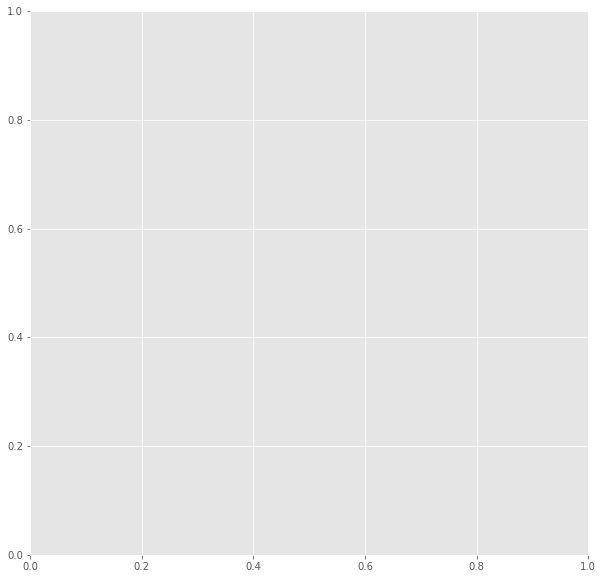

In [20]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,10))
# corr() is actually pearson correlation
sns.heatmap(corr_df1.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

#### finding out null values 

In [4]:
bottle_df.isnull()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
864859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
864861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [5]:
#removing missing data from all columns
bottle_df1 = bottle_df.dropna(axis =1, thresh= len(bottle_df)-3)
bottle_df1

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,RecInd,R_Depth,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,3,0,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,3,8,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,7,10,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,3,19,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,7,20,20
...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,7,0,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,3,2,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,3,5,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,3,10,10


In [7]:
bottle_df1=bottle_df[[ 'R_SALINITY', 'R_DYNHT', 'R_SIGMA', 'STheta', 'R_Depth', 'R_PRES', 'RecInd', 'NH3q', 'Phaqua', 'Chlqua',  
                      'C14A2q', 'C14A1q', 'MeanAq', 'DarkAq', 'P_qual', 'T_prec', 'S_prec', 'T_degC', 'R_TEMP', 'R_POTEMP',
                      'Oxy_?mol/Kg', 'R_O2', 'R_O2Sat', 'O2ml_L', 'R_O2', 'R_SVA' ]]
bottle_df1


,R_SALINITY,R_DYNHT,R_SIGMA,STheta,R_Depth,R_PRES,RecInd,NH3q,Phaqua,Chlqua,...,S_prec,T_degC,R_TEMP,R_POTEMP,Oxy_?mol/Kg,R_O2,R_O2Sat,O2ml_L,R_O2,R_SVA
0,33.44,0,25.64,25.649,0,0,3,9,9,9,...,2,10.5,10.5,10.5,NaN,NaN,NaN,NaN,NaN,233
1,33.44,0.01,25.65,25.656,8,8,3,9,9,9,...,2,10.46,10.46,10.46,NaN,NaN,NaN,NaN,NaN,232.5
2,33.437,0.02,25.65,25.654,10,10,7,9,9,9,...,3,10.46,10.46,10.46,NaN,NaN,NaN,NaN,NaN,232.8
3,33.42,0.04,25.64,25.643,19,19,3,9,9,9,...,2,10.45,10.45,10.45,NaN,NaN,NaN,NaN,NaN,234.1
4,33.421,0.04,25.64,25.643,20,20,7,9,9,9,...,3,10.45,10.45,10.45,NaN,NaN,NaN,NaN,NaN,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,33.408,0,23.871,23.87055,0,0,7,NaN,NaN,NaN,...,3,18.744,18.74,18.74,253.47,5.81,108.7,5.805,5.81,402.4
864859,33.408,0.008,23.871,23.87072,2,2,3,4,NaN,NaN,...,3,18.744,18.74,18.74,253.47,5.81,108.7,5.805,5.81,402.5
864860,33.415,0.02,23.889,23.88911,5,5,3,4,NaN,NaN,...,3,18.692,18.69,18.69,253.06,5.8,108.5,5.796,5.8,400.8
864861,33.406,0.04,24.014,24.01426,10,10,3,NaN,NaN,NaN,...,3,18.161,18.16,18.16,253.92,5.82,107.7,5.816,5.82,389.1


In [9]:
bottle_df1.describe()


,R_SALINITY,R_DYNHT,R_SIGMA,STheta,R_Depth,R_PRES,RecInd,NH3q,Phaqua,Chlqua,...,S_prec,T_degC,R_TEMP,R_POTEMP,Oxy_?mol/Kg,R_O2,R_O2Sat,O2ml_L,R_O2,R_SVA
count,817509,818206,812007,812174,864863,864863,864863,808299,639170,639166,...,817509,853900,853900,818816,661268,696201,666448,696201,696201,812092
unique,3584,1848,4398,36368,3219,3328,5,2,2,2,...,2,13847,2819,2857,391814,871,1453,6500,871,5254
top,33.58,0,26.97,26.979,10,10,3,9,9,9,...,3,9.1,9.1,9.27,0,5.8,102.4,5.8,5.8,146.9
freq,4003,32523,3950,488,35225,35250,455956,799839,639070,639069,...,585980,1115,1157,1038,53,3023,2890,2876,3023,534


#### Check for NULL percentages

In [11]:
nulls = bottle_df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(bottle_df)*100,2)

df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
df_null.Attr  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head(20))

                   Attr   Total  Percent
0                   pH2  864853   100.00
1   DIC Quality Comment  864808    99.99
2                   pH1  864779    99.99
3                  DIC2  864639    99.97
4                   TA2  864629    99.97
5                  DIC1  862864    99.77
6                   TA1  862779    99.76
7                C14A2p  852121    98.53
8                C14A1p  852103    98.52
9                C14As2  850449    98.33
10               C14As1  850431    98.33
11               IncTim  850426    98.33
12               LightP  846212    97.84
13               DarkAp  844406    97.63
14               MeanAp  844406    97.63
15               DarkAs  842214    97.38
16               MeanAs  842213    97.38
17               T_qual  841736    97.33
18                NH3uM  799901    92.49
19                R_NH4  799881    92.49


#### Salinity Plots 

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Salinity Distribution (g/Kg)'}, xlabel='Salnty', ylabel='Density'>

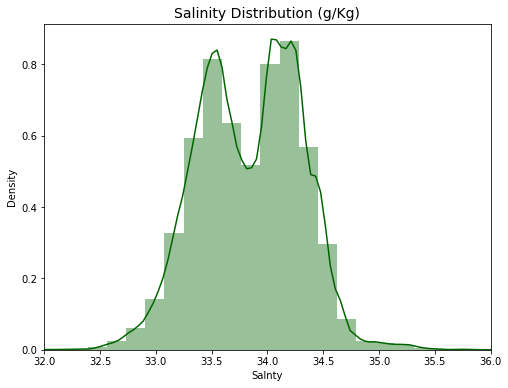

In [12]:
#  Salinity distribution
plt.figure(figsize=(8,6))
plt.xlim([32, 36])#  Salinity distribution
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(bottle_df['Salnty'], color='darkgreen')


### preprocessing for cast file data

In [13]:
cast_df= pd.read_csv('cast.csv')
cast_df

C:\Users\sachn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,1.949030e+13,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,1.949030e+13,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,1.949030e+13,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,1.949030e+13,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,1.949030e+13,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,2.016110e+13,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,2.016110e+13,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,2.016110e+13,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,2.016110e+13,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


In [14]:
cast_df.tail()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
34399,34400,2016-11-06-C-33SR,201611,2.016110e+13,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,2.016110e+13,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,2.016110e+13,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,2.016110e+13,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0
34403,34404,2016-11-06-C-33SR,201611,2.016110e+13,9340264,20-1611SR-MX-310-22:39-09340264,093.4 026.4,4,ST,-1.558,...,8.0,25.0,2.0,1015.4,20.0,17.5,1.0,2.0,2.0,6.0


In [15]:
print(cast_df.dtypes)

Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta      float64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object


#### Cleaning up null values

In [16]:
missing_values_sum2 =cast_df.isnull().sum()
missing_values_sum2

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

In [17]:
total_length2 =len(cast_df)
total_length2

34404

In [18]:
# percentage missing values

Percentage_missing_values2= missing_values_sum2 / total_length2 *100
Percentage_missing_values2

Cst_Cnt        0.000000
Cruise_ID      0.000000
Cruise         0.000000
Cruz_Sta       0.000000
DbSta_ID       0.000000
                ...    
Wet_T         44.805837
Wea           22.081735
Cloud_Typ     71.166143
Cloud_Amt     65.463318
Visibility    72.366585
Length: 61, dtype: float64

In [19]:
#removing missing data from all columns
cast_df2 = cast_df.dropna(axis =1)
cast_df2

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Date,...,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Ship_Code,Data_Type,Orig_Sta_ID,Cruz_Num
0,1,1949-03-01-C-31CR,194903,1.949030e+13,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,3/1/1949,...,54.0,54.0,53.8,56.0,56.0,55.8,31CR,HY,054 56,4903
1,2,1949-03-01-C-31CR,194903,1.949030e+13,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,3/1/1949,...,52.0,52.0,51.5,75.0,75.0,75.1,31CR,HY,052 75,4903
2,3,1949-03-01-C-31CR,194903,1.949030e+13,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,3/2/1949,...,51.0,51.0,50.3,85.0,85.0,84.7,31CR,HY,051 85,4903
3,4,1949-03-01-C-31CR,194903,1.949030e+13,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,3/2/1949,...,50.0,50.0,49.2,95.0,95.0,94.3,31CR,HY,050 95,4903
4,5,1949-03-01-C-31CR,194903,1.949030e+13,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,3/2/1949,...,50.0,50.0,48.0,104.0,104.0,103.7,31CR,HY,050 104,4903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,2.016110e+13,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,11/9/2016,...,93.3,93.3,93.3,90.0,90.0,90.0,33SR,MX,93.3 90.0,1611
34400,34401,2016-11-06-C-33SR,201611,2.016110e+13,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,11/9/2016,...,93.3,93.3,93.3,100.0,100.0,100.0,33SR,MX,93.3 100.0,1611
34401,34402,2016-11-06-C-33SR,201611,2.016110e+13,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,11/9/2016,...,93.3,93.3,93.3,110.0,110.0,110.0,33SR,MX,93.3 110.0,1611
34402,34403,2016-11-06-C-33SR,201611,2.016110e+13,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,11/9/2016,...,93.3,93.3,93.3,120.0,120.0,120.0,33SR,MX,93.3 120.0,1611


#### To map the ordinal values to integers, we can use the pandas DataFrame method replace() to map sta_code to 
appropriate numeric values

In [20]:
cast_df2["Sta_Code"].unique()

array(['NST', 'OCO', 'NRO', 'ST', 'IMX', 'MBR', 'SCO'], dtype=object)

In [22]:
map_dict = {"Sta_Code" : { "NST" :"1" ,
                            "OCO" : "2" ,
                            "NRO" : "3",
                            "ST" : "4" , 
                            "IMX" : "5",
                            "MBR" : "6",
                            "SCO" : "7"} }

In [23]:
cast_df2=cast_df2.replace(map_dict)
cast_df2.loc[:,'Sta_Code']

0        1
1        1
2        1
3        1
4        1
        ..
34399    4
34400    4
34401    4
34402    4
34403    4
Name: Sta_Code, Length: 34404, dtype: object

In [24]:
cast_df2["Data_Type"].unique()

array(['HY', 'CT', 'PR', '10', 'MX'], dtype=object)

In [26]:

cast_df2.isnull().mean()

Cst_Cnt        0.0
Cruise_ID      0.0
Cruise         0.0
Cruz_Sta       0.0
DbSta_ID       0.0
Cast_ID        0.0
Sta_ID         0.0
Quarter        0.0
Sta_Code       0.0
Date           0.0
Year           0.0
Month          0.0
Julian_Date    0.0
Julian_Day     0.0
Lat_Dec        0.0
Lat_Deg        0.0
Lat_Min        0.0
Lat_Hem        0.0
Lon_Dec        0.0
Lon_Deg        0.0
Lon_Min        0.0
Lon_Hem        0.0
Rpt_Line       0.0
St_Line        0.0
Ac_Line        0.0
Rpt_Sta        0.0
St_Station     0.0
Ac_Sta         0.0
Ship_Code      0.0
Data_Type      0.0
Orig_Sta_ID    0.0
Cruz_Num       0.0
dtype: float64

In [27]:
# checking datatypes
cast_df2.dtypes

Cst_Cnt          int64
Cruise_ID       object
Cruise           int64
Cruz_Sta       float64
DbSta_ID         int64
Cast_ID         object
Sta_ID          object
Quarter          int64
Sta_Code        object
Date            object
Year             int64
Month            int64
Julian_Date      int64
Julian_Day       int64
Lat_Dec        float64
Lat_Deg          int64
Lat_Min        float64
Lat_Hem         object
Lon_Dec        float64
Lon_Deg          int64
Lon_Min        float64
Lon_Hem         object
Rpt_Line       float64
St_Line        float64
Ac_Line        float64
Rpt_Sta        float64
St_Station     float64
Ac_Sta         float64
Ship_Code       object
Data_Type       object
Orig_Sta_ID     object
Cruz_Num        object
dtype: object

### 3.Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [73]:
bottle_df2.fillna(method='ffill', inplace=True)

C:\Users\sachn\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


#### creating X and Y variable

In [74]:
X = pd.DataFrame(np.c_[bottle_df['Salnty']], columns = ['Salnty'])
y = bottle_df2['T_degC']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(691890, 1)
(172973, 1)
(691890, 1)
(172973, 1)


#### Evaluating Model

In [82]:
X = np.array(bottle_df2['Salnty']).reshape(-1,1)
y = np.array(bottle_df['T_degC']).reshape(-1,1)

#### Splitting data in to test and train sets

In [83]:
from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = regression_df.predict(X_test)

### 4.Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 

In [90]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("Root mean square error Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

Root mean square error Score for Test set: 3.8
R2 Score for Test set: 0.21


In [91]:
accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.2058369955850775


In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2058369955850775

### 5.Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

#### selecting temperature(T_degC) and salinity(Salnty) columns to evaluate further

In [4]:
bottle_df2=bottle_df[['T_degC', 'Salnty' ]]
bottle_df2


,T_degC,Salnty
0,10.5,33.44
1,10.46,33.44
2,10.46,33.437
3,10.45,33.42
4,10.45,33.421
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.415
864861,18.161,33.4062


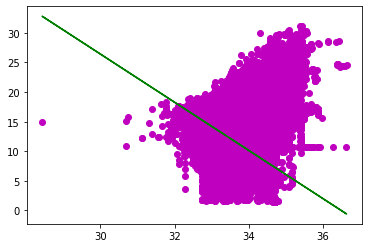

In [88]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='g')
plt.show()

In [ ]:
ax=sns.scatterplot(x=bottle_df2.Salnty, y=bottle_df2.T_degC)
ax.set(title='temperature versus salinity graph')


[Text(0.5, 1.0, 'temperature versus salinity graph')]

### 6. Do some research on polynomial regression. Describe what it is any how it works in markdown. 

1.How do you explain polynomial regression?
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

2.What is polynomial regression used for?
It is used in many experimental procedures to produce the outcome using this equation. It provides a great defined relationship between the independent and dependent variables. It is used to study the isotopes of the sediments.

3.What is polynomial regression in machine learning?
Polynomial regression, like linear regression, uses the relationship between the variables x and y to find the best way to draw a line through the data points.

### 7.Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

#### Training Polynomial regression model with entire data

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree = 2)
X_poly = ploy_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)

LinearRegression()

#### Predicting the Test set results

In [24]:
y_pred = regressor.predict(ploy_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)),1))

[[11.12 16.26]
 [10.82 10.68]
 [ 9.77 18.02]
 ...
 [12.69 16.35]
 [13.36 14.23]
 [ 8.31  3.39]]


#### Plotting polynomial curve for test data

### 8.Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

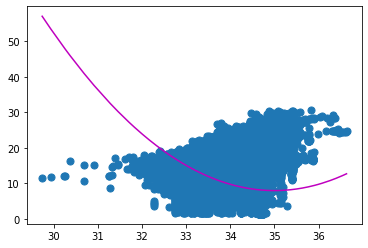

In [25]:
import operator
plt.scatter(X_test, y_test, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,y_pred), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()